# Homework 1

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import combinations
import collections

# Lets work on network 1. 

First, we import the data.

In [3]:
G2 = nx.read_edgelist('./Networks/p2p-Gnutella08.txt', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter='\t', 
                     nodetype=int, 
                     encoding='utf-8')

In [4]:
N = len(G2)
L = G2.size()
sL= G2.number_of_selfloops()
degrees = [G2.degree(node) for node in G2]
in_degree=[G2.in_degree(node) for node in G2]
out_degree=[G2.out_degree(node) for node in G2]
sink_nodes = [node for node, outdegree in G2.out_degree(G2.nodes()).items() if outdegree == 0]
source_nodes = [node for node, indegree in G2.in_degree(G2.nodes()).items() if indegree == 0]
kmin = min(degrees)
kmax = max(degrees)
#Undirected graph of our directed graph
uG2=nx.Graph(G2)
clCo=nx.average_clustering(uG2)
gClCo=nx.transitivity(G2)

Lets check if the graph is connected or not.

In [5]:
print("Check if graph is connected")
print(nx.is_connected(uG2))

Check if graph is connected
False


Because our graph is not connected, we will use as our diameter, the diameter of the largest connected component

In [6]:

subGraphsDiam=[]
if nx.is_connected(uG2)==False:
    comp=nx.connected_component_subgraphs(uG2)
    for i in comp:
        subGraphsDiam.append(nx.diameter(i))
    diam=max(subGraphsDiam)
else:
    diam=nx.diameter(uG2)


Now, lets find the stongly and weakly connected components of our network.

In [7]:
strong = G2.subgraph(max(nx.strongly_connected_components(G2), key=len))
weak = G2.subgraph(max(nx.weakly_connected_components(G2), key=len))

Bellow, we have a function to compute if 2 nodes have a bidirectional relationship

In [8]:
def have_bidirectional_relationship(G, node1, node2):
    return G.has_edge(node1, node2) and G.has_edge(node2, node1)

In [9]:
biconnections = set()
for u, v in G2.edges():
    if u > v:  # Avoid duplicates, such as (1, 2) and (2, 1)
        v, u = u, v
    if have_bidirectional_relationship(G2, u, v):
        biconnections.add((u, v))


In [10]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Number of self loops", sL)
print()
print("Number of reciprocated edges",len(biconnections))
print()
print("Sink nodes", len(sink_nodes))
print()
print("Source nodes", len(source_nodes))
print()
print("Average degree", np.mean(degrees))
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print()
print("Average in-degree", np.mean(in_degree))
print("Minimum in-degree", min(in_degree))
print("Maximum in-degree", max(in_degree))
print()
print("Average out-degree", np.mean(out_degree))
print("Minimum out-degree", min(out_degree))
print("Maximum out-degree", max(out_degree))
print()
print("Diameter:",diam)
print()
print("Average Clustering Coefficient:",clCo)
print()
print("Global clustering coefficient:",gClCo)
print()
print("Nodes of Largest Strongly Connected Component",len(strong))
print("Edges of Largest Strongly Connected Component",len(strong.edges()))
print()
print("Nodes of Largest Weakly Connected Component",len(weak))
print("Edges of Largest Weakly Connected Component",len(weak.edges()))
print()

Number of nodes:  6301
Number of edges:  20777

Number of self loops 0

Number of reciprocated edges 0

Sink nodes 3836

Source nodes 80

Average degree 6.594826218060625
Minimum degree:  1
Maximum degree:  97

Average in-degree 3.2974131090303125
Minimum in-degree 0
Maximum in-degree 91

Average out-degree 3.2974131090303125
Minimum out-degree 0
Maximum out-degree 48

Diameter: 9

Average Clustering Coefficient: 0.010867921935819964

Global clustering coefficient: 0.012464558925801101

Nodes of Largest Strongly Connected Component 2068
Edges of Largest Strongly Connected Component 9313

Nodes of Largest Weakly Connected Component 6299
Edges of Largest Weakly Connected Component 20776



# Counting the Clustering coefficient of Largest connected component

In [11]:
clCo=nx.average_clustering(uG2.subgraph(max(nx.connected_components(uG2), key=len)))
gClCo=nx.transitivity(uG2.subgraph(max(nx.connected_components(uG2), key=len)))
print(clCo)
print(gClCo)

0.010871372617495085
0.020659879260070572


# Plot time

Because we have a directed graph we are going to plot the in/out and total degree for our graph

# Linear scale

## Degree plot 

In [12]:
bin_edges = np.linspace(kmin, kmax, num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

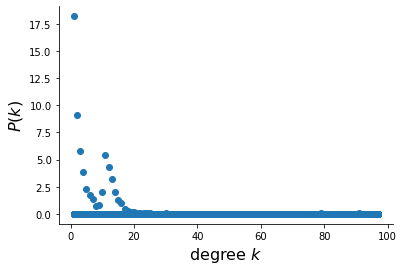

In [13]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## In Degree

In [14]:
bin_edges = np.linspace(min(in_degree)+1, max(in_degree), num=len(in_degree))
density2, bins = np.histogram(in_degree, bins=bin_edges, density=True)

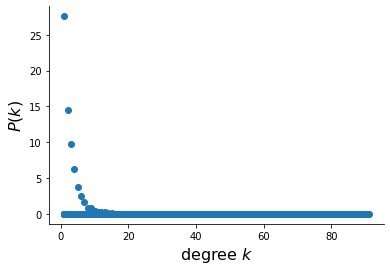

In [15]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density2, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## Out-degree

In [16]:
bin_edges = np.linspace(min(out_degree)+1, max(out_degree), num=len(out_degree))
density3, bins = np.histogram(out_degree, bins=bin_edges, density=True)

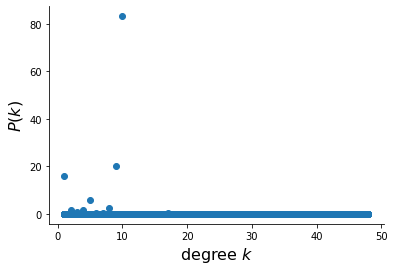

In [17]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density3, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# Logarithmic scale without log binning

## Degree

In [18]:
bin_edges = np.linspace(kmin, kmax, num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

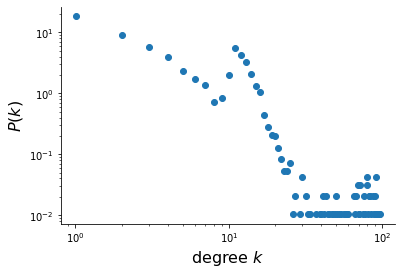

In [19]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## In-Degree

In [20]:
bin_edges = np.linspace(min(in_degree)+1, max(in_degree), num=len(in_degree))
density2, bins = np.histogram(in_degree, bins=bin_edges, density=True)

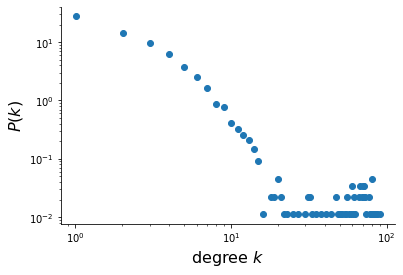

In [21]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density2, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## Out-Degree

In [22]:
bin_edges = np.linspace(min(out_degree)+1, max(out_degree), num=len(out_degree))
density3, bins = np.histogram(out_degree, bins=bin_edges, density=True)

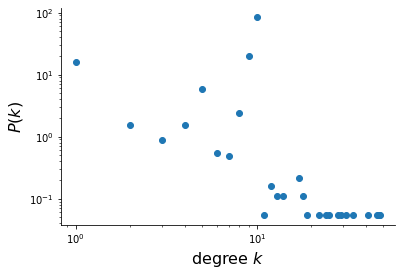

In [23]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density3, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# Logarithmic scale with log binning

## Degree

In [24]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

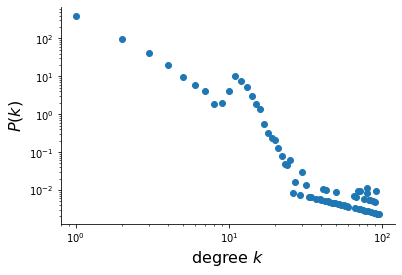

In [25]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## In-Degree

In [26]:
bin_edges = np.logspace(np.log10(min(in_degree)+1), np.log10(max(in_degree)), num=len(in_degree))
density2, bins = np.histogram(in_degree, bins=bin_edges, density=True)

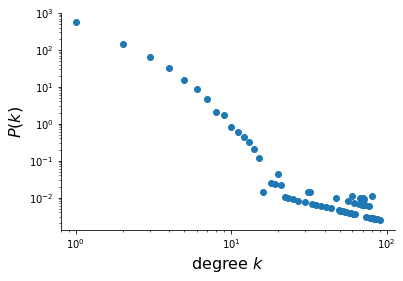

In [27]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density2, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## Out- Degree

In [28]:
bin_edges = np.logspace(np.log10(min(out_degree)+1), np.log10(max(out_degree)), num=len(out_degree))
density3, bins = np.histogram(out_degree, bins=bin_edges, density=True)

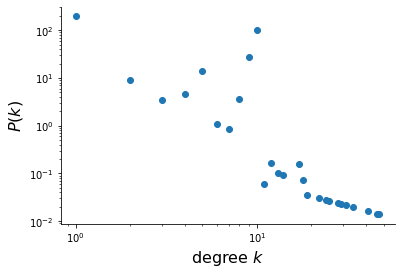

In [29]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density3, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# Cumulative Distribution

## Degree

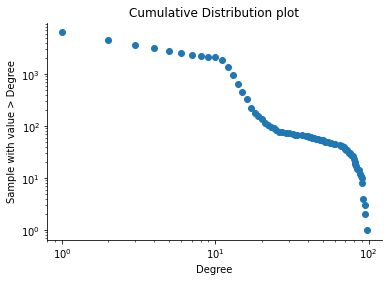

In [30]:
degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# ...With Log Binning

(97, 95, 94, 92, 91, 90, 89, 88, 87, 84, 83, 82, 81, 80, 79, 77, 76, 75, 72, 71, 70, 69, 67, 66, 65, 60, 59, 57, 56, 54, 52, 51, 50, 49, 48, 47, 45, 44, 43, 42, 41, 40, 39, 37, 34, 33, 32, 30, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)


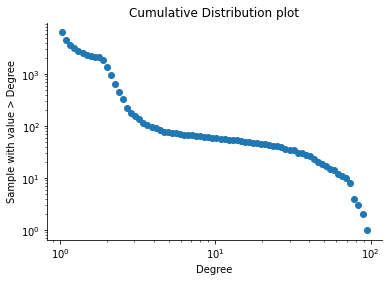

In [31]:
degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)

print(deg)

bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=len(deg)+1)
density, bins = np.histogram(degrees, bins=bin_edges, density=True)
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)


plt.loglog(x, sorted(cs,reverse=True), marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

## In- Degree

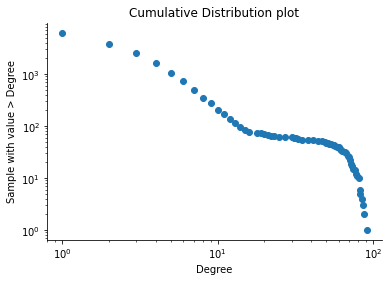

In [32]:
degree_sequence = sorted(in_degree, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.show()

# With Log Binning

(91, 87, 86, 85, 83, 82, 81, 79, 78, 77, 74, 73, 72, 71, 70, 69, 67, 66, 63, 62, 61, 60, 59, 57, 56, 55, 54, 52, 51, 50, 49, 47, 44, 41, 38, 35, 33, 32, 31, 30, 27, 25, 23, 22, 21, 20, 19, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)


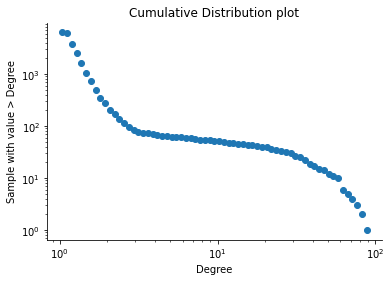

In [33]:
degree_sequence = sorted(in_degree, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)

print(deg)

bin_edges = np.logspace(np.log10(min(in_degree)+1), np.log10(max(in_degree)), num=len(deg)+1)
density, bins = np.histogram(in_degree, bins=bin_edges, density=True)
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)



plt.loglog(x, sorted(cs,reverse=True), marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

## Out- Degree

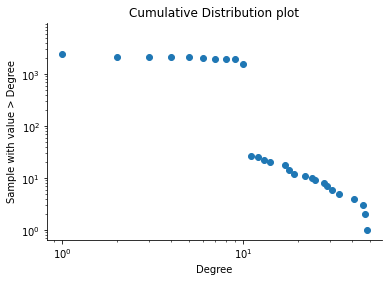

In [34]:
degree_sequence = sorted(out_degree, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# .. with log binning

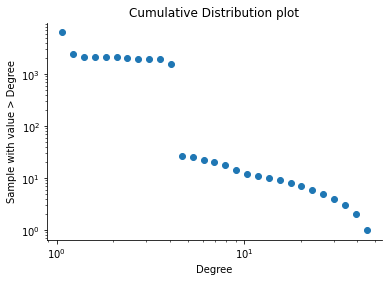

In [35]:
degree_sequence = sorted(out_degree, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)


bin_edges = np.logspace(np.log10(min(out_degree)+1), np.log10(max(out_degree)), num=len(deg)+1)
density, bins = np.histogram(in_degree, bins=bin_edges, density=True)
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)


plt.loglog(x, sorted(cs,reverse=True), marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

# Zipf Distribution

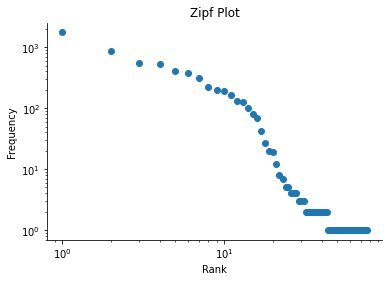

In [36]:

degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.loglog([i+1 for i in range(len(deg))],sorted(cnt, reverse=True), marker='o', linestyle='none')
plt.title("Zipf Plot")
plt.ylabel("Frequency")
plt.xlabel("Rank")


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()



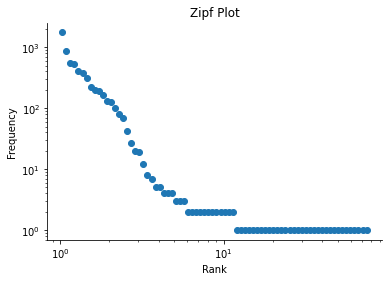

In [46]:

degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

bin_edges = np.logspace(np.log10(1), np.log10(len(deg)+1), num=len(deg)+1)
density, bins = np.histogram([i for i in range(len(cnt))], bins=bin_edges, density=True)
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x,sorted(cnt, reverse=True), marker='o', linestyle='none')
plt.title("Zipf Plot")
plt.ylabel("Frequency")
plt.xlabel("Rank")


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()
